In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/oneautumleaf/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
df = pd.read_csv('datasets/penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [7]:
df.shape

(344, 7)

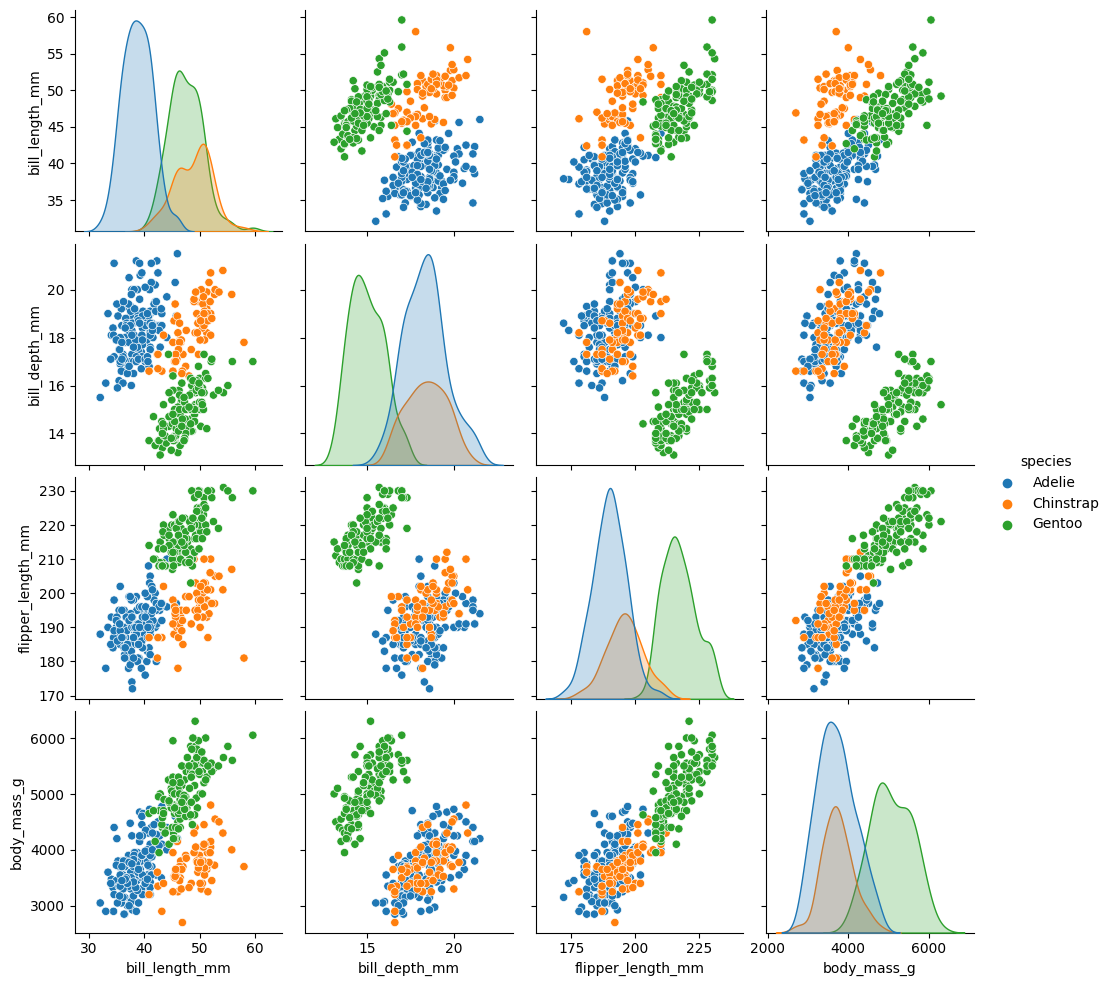

In [8]:
sns.pairplot(df, hue='species')

Data Preprocessing

In [9]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [11]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [12]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [13]:
df.sex.unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [14]:
X = df.drop('species', axis=1)
y = df['species']

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numeric_features = [col for col in X.columns if X[col].dtype != 'object']
numeric_transformer = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)

preprocessor = ColumnTransformer(
    [
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ],
)

In [16]:
X_t = pd.DataFrame(preprocessor.fit_transform(X), columns=preprocessor.get_feature_names_out())
X_t

,numeric__bill_length_mm,numeric__bill_depth_mm,numeric__flipper_length_mm,numeric__body_mass_g,categorical__island_Biscoe,categorical__island_Dream,categorical__island_Torgersen,categorical__sex_FEMALE,categorical__sex_MALE
0,-0.887622,0.787289,-1.420541,-0.564625,0.0,0.0,1.0,0.0,1.0
1,-0.814037,0.126114,-1.063485,-0.502010,0.0,0.0,1.0,1.0,0.0
2,-0.666866,0.431272,-0.420786,-1.190773,0.0,0.0,1.0,1.0,0.0
3,0.096581,0.075255,-0.277964,-0.188936,0.0,0.0,1.0,0.0,1.0
4,-1.329133,1.092447,-0.563608,-0.940314,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
339,0.096581,0.075255,-0.277964,-0.188936,1.0,0.0,0.0,0.0,1.0
340,0.528894,-1.450534,1.007436,0.812900,1.0,0.0,0.0,1.0,0.0
341,1.191161,-0.738500,1.507314,1.939966,1.0,0.0,0.0,0.0,1.0
342,0.234553,-1.196236,0.793203,1.251204,1.0,0.0,0.0,1.0,0.0


In [17]:
X_t.shape

(344, 9)

In [18]:
X.shape

(344, 6)

In [19]:
preprocessor.get_feature_names_out()

array(['numeric__bill_length_mm', 'numeric__bill_depth_mm',
       'numeric__flipper_length_mm', 'numeric__body_mass_g',
       'categorical__island_Biscoe', 'categorical__island_Dream',
       'categorical__island_Torgersen', 'categorical__sex_FEMALE',
       'categorical__sex_MALE'], dtype=object)

In [20]:
X = pd.DataFrame(preprocessor.fit_transform(X), columns=preprocessor.get_feature_names_out())

KMeans

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

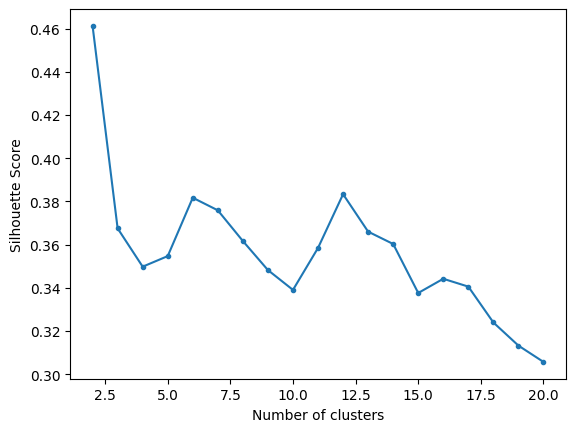

In [22]:
max_num_clusters = 20
scores = []
for i in range(2, max_num_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans_clusters = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, kmeans_clusters))

plt.plot(range(2, max_num_clusters + 1), scores, marker='.')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

elbow - 2

Agglomerative Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

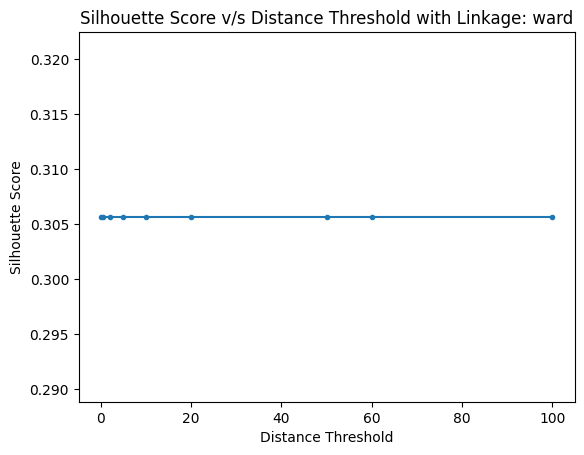

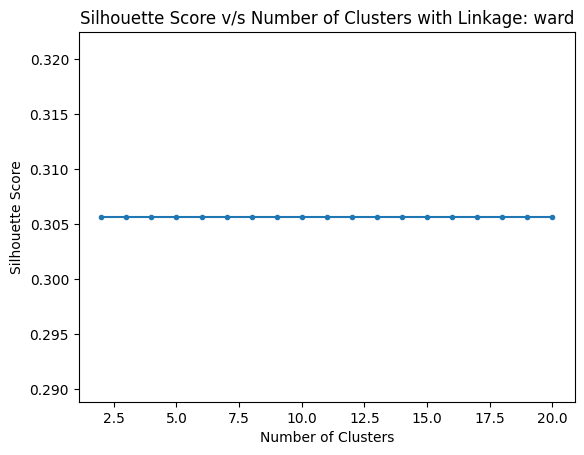

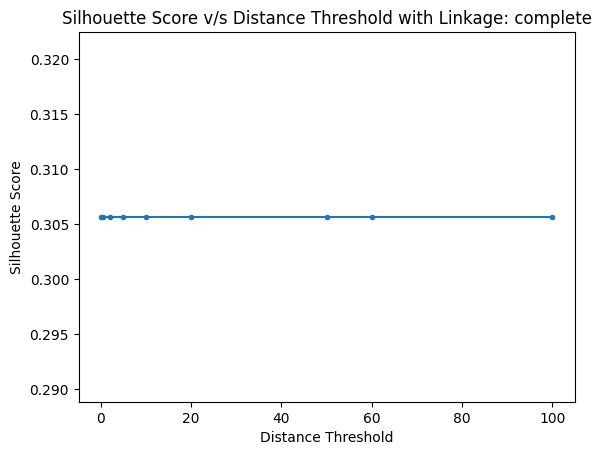

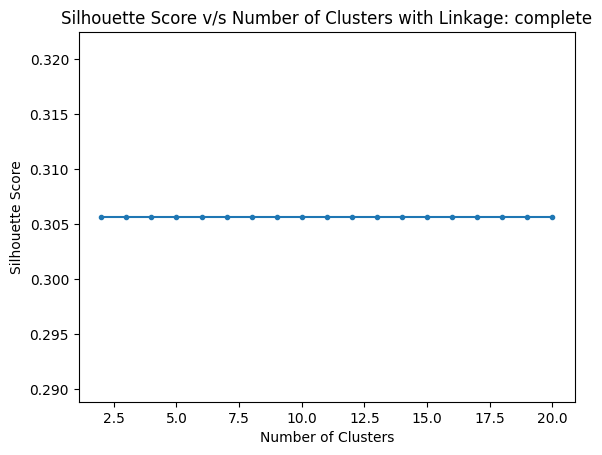

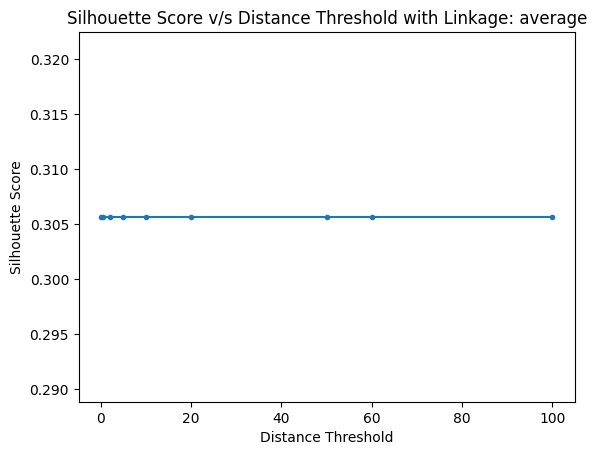

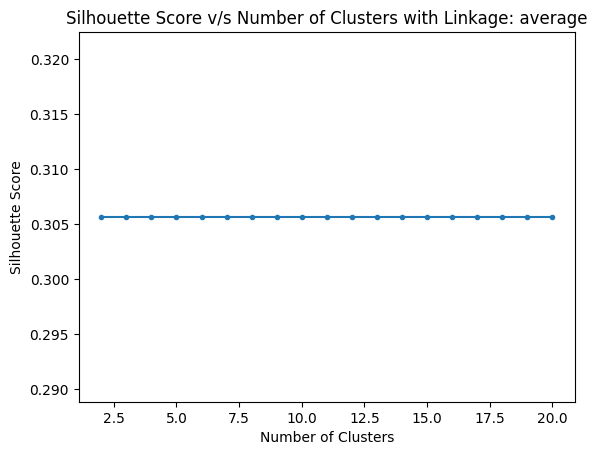

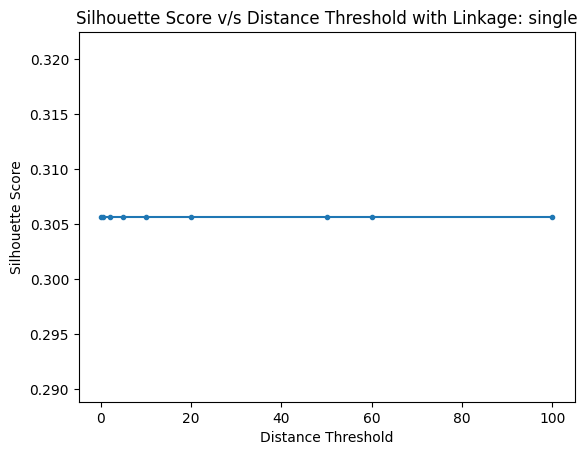

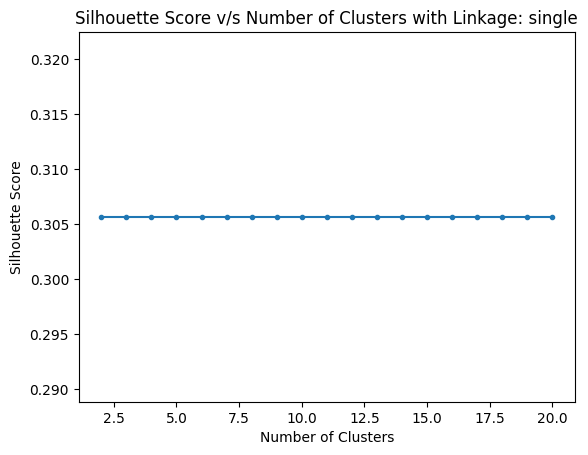

In [24]:
for linkage in ['ward', 'complete', 'average', 'single']:
    dist_arr = [.1, .4, 2, 5, 10, 20, 50, 60, 100]
    scores = []
    for dist in dist_arr:
        agg = AgglomerativeClustering(n_clusters=None, distance_threshold=dist, linkage=linkage)
        clusters = agg.fit_predict(X)
        scores.append(silhouette_score(X, kmeans_clusters))

    plt.plot(dist_arr, scores, marker='.')
    plt.xlabel("Distance Threshold")
    plt.ylabel("Silhouette Score")
    plt.title(f"Silhouette Score v/s Distance Threshold with Linkage: {linkage}")
    plt.show()

    scores = []
    for i in range(2, max_num_clusters + 1):
        agg = AgglomerativeClustering(n_clusters=i, linkage=linkage)
        clusters = agg.fit_predict(X)
        scores.append(silhouette_score(X, kmeans_clusters))

    plt.plot(range(2, max_num_clusters + 1), scores, marker='.')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title(f"Silhouette Score v/s Number of Clusters with Linkage: {linkage}")
    plt.show()

DBSCAN Clustering

In [25]:
from sklearn.cluster import DBSCAN

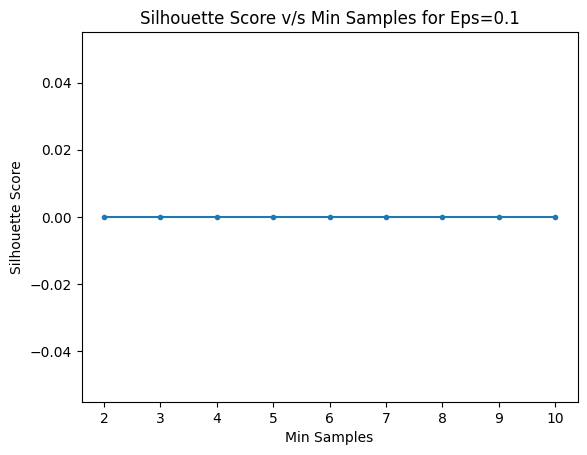

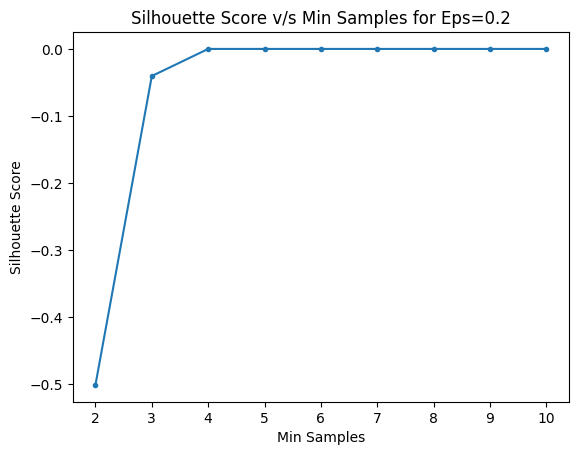

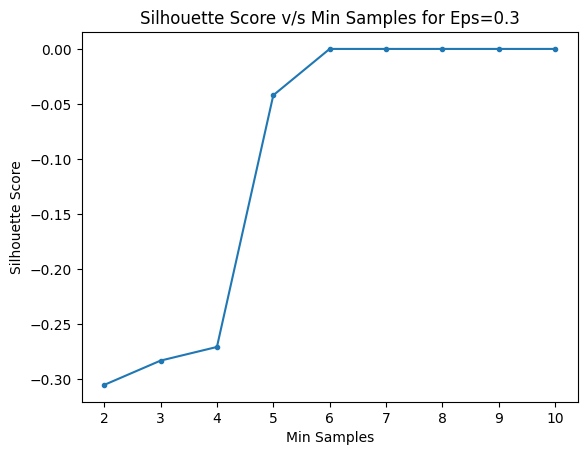

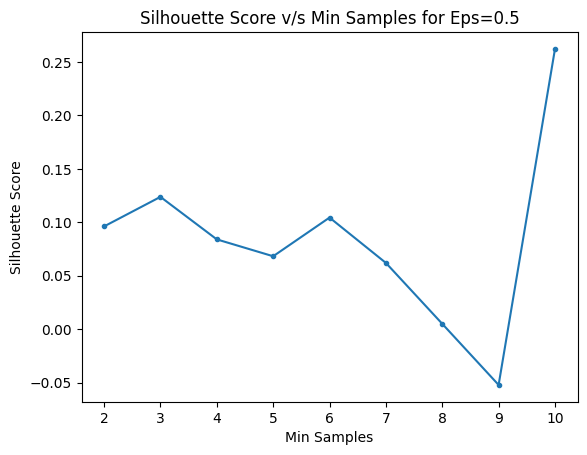

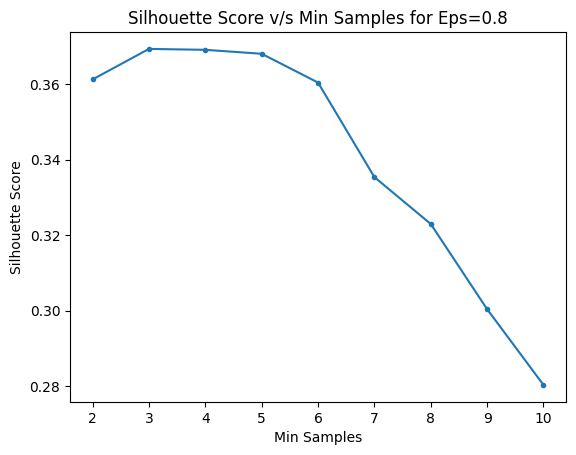

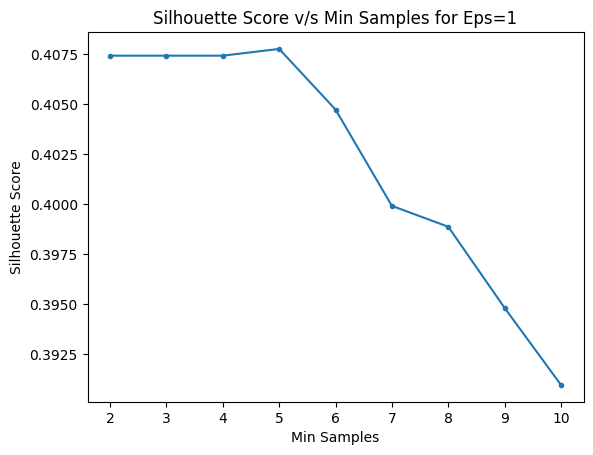

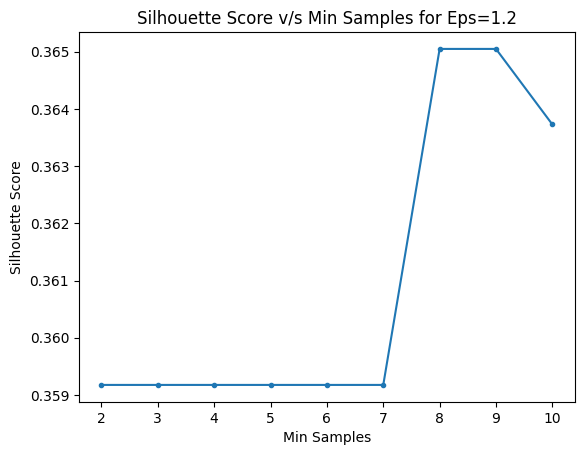

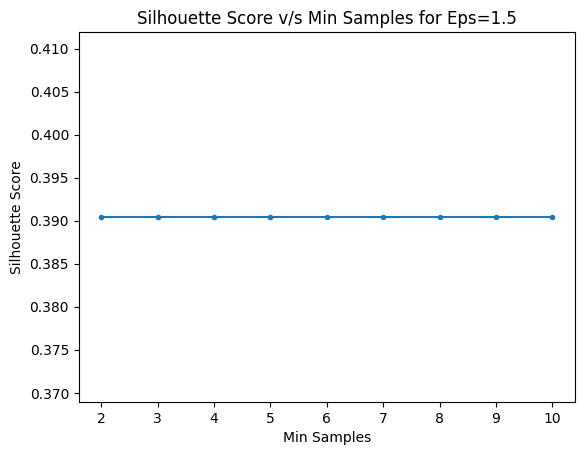

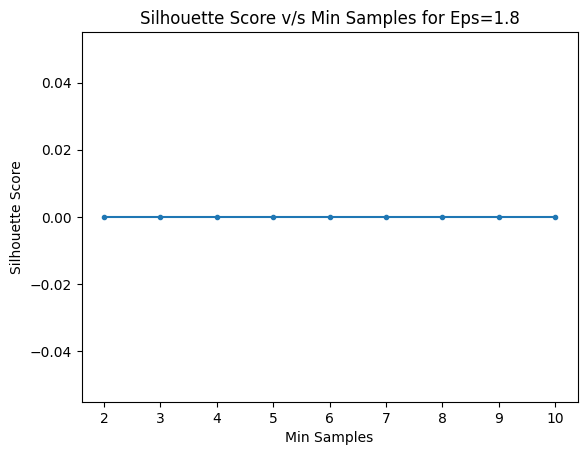

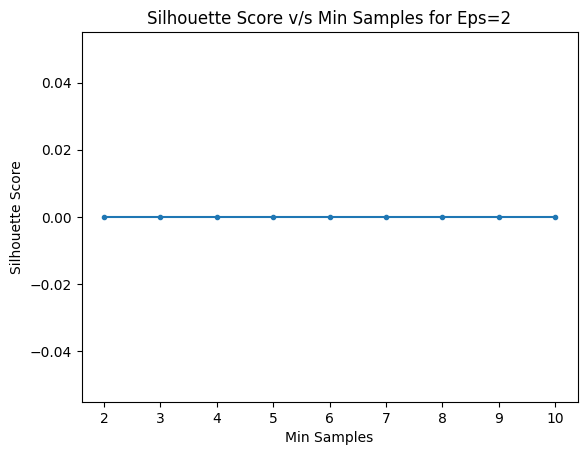

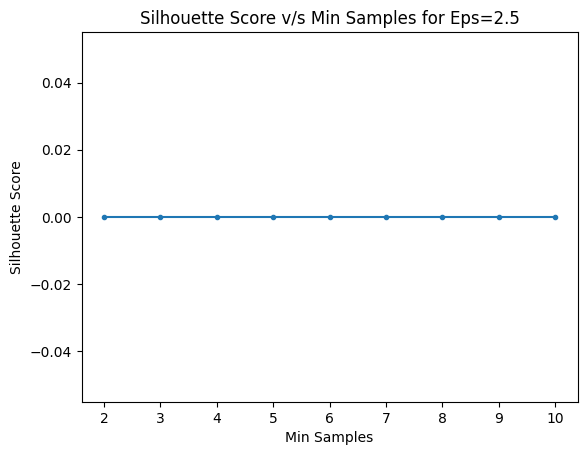

In [26]:
eps_arr = [0.1, .2, .3, .5, .8, 1, 1.2, 1.5, 1.8, 2, 2.5]
for eps in eps_arr:
    scores = []
    max_min_samples = 10
    for min_samples in range(2, max_min_samples + 1):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)
        try:
            scores.append(silhouette_score(X, clusters))
        except ValueError:
            scores.append(0)

    plt.plot(range(2, max_min_samples + 1), scores, marker='.')
    plt.xlabel("Min Samples")
    plt.ylabel("Silhouette Score")
    plt.title(f"Silhouette Score v/s Min Samples for Eps={eps}")
    plt.show()

Jaccard Score

In [27]:
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import LabelEncoder

In [28]:
y_enc = LabelEncoder().fit_transform(y)

In [29]:
kmeans_clusters = KMeans(n_clusters=3).fit_predict(X)

/home/oneautumleaf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
import copy
yy = copy.deepcopy(y_enc)

In [31]:
yy[yy == 1] = 5
yy[yy == 2] = 6
yy[yy == 5] = 2
yy[yy == 6] = 1

In [32]:
jaccard_score(y_enc, kmeans_clusters, average='micro')

0.09554140127388536

In [33]:
agg = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg.fit_predict(X)
jaccard_score(y_enc, agg_clusters, average='micro')

0.2835820895522388

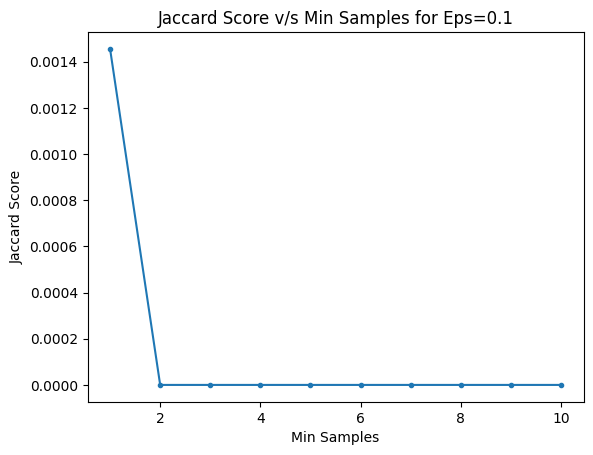

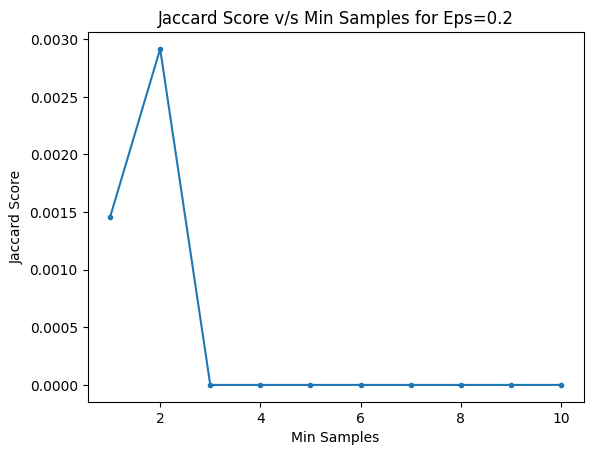

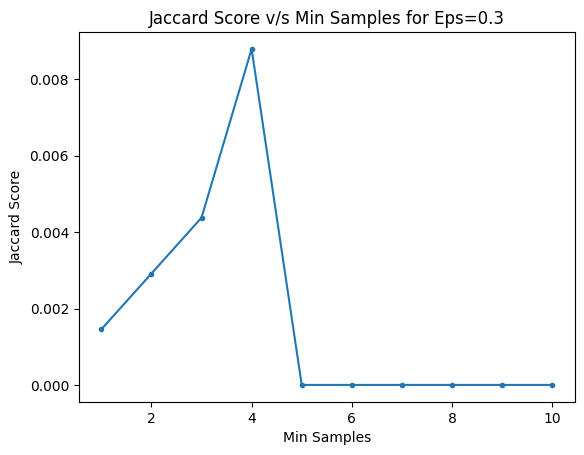

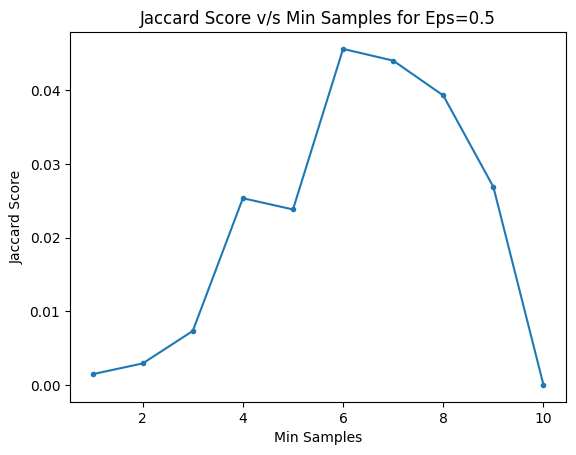

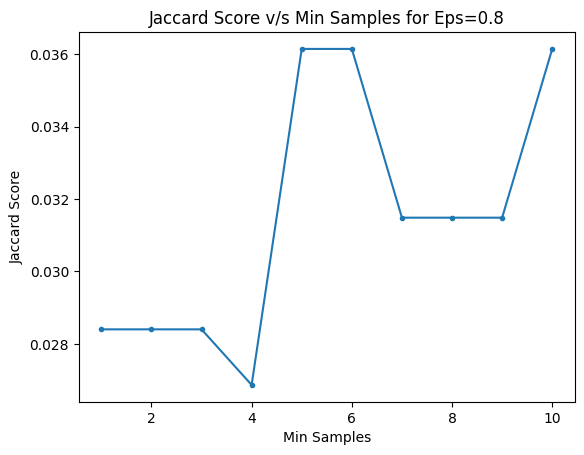

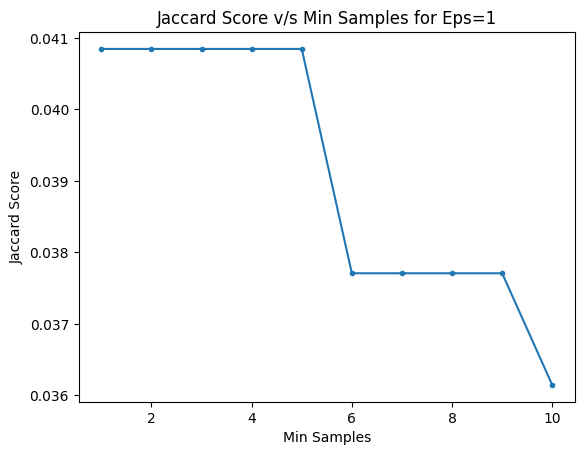

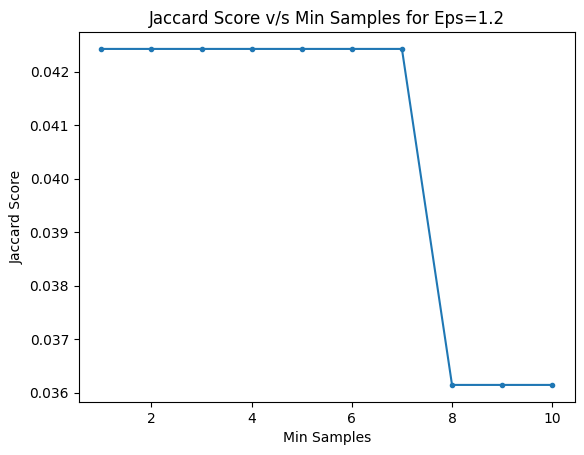

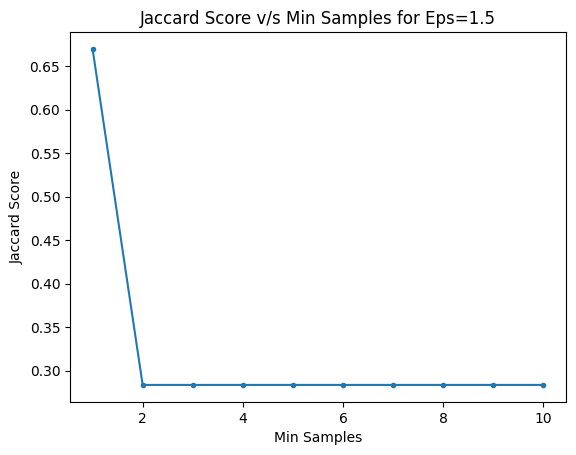

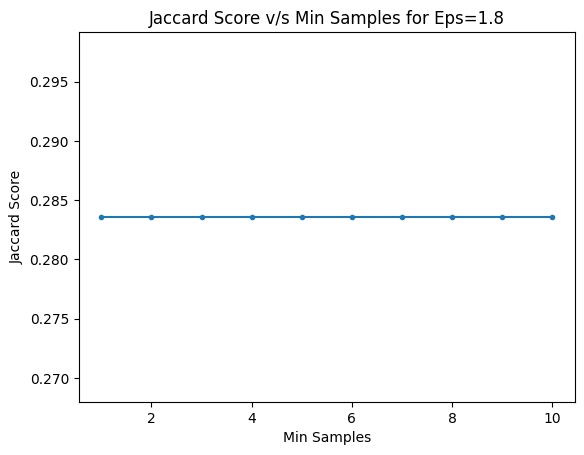

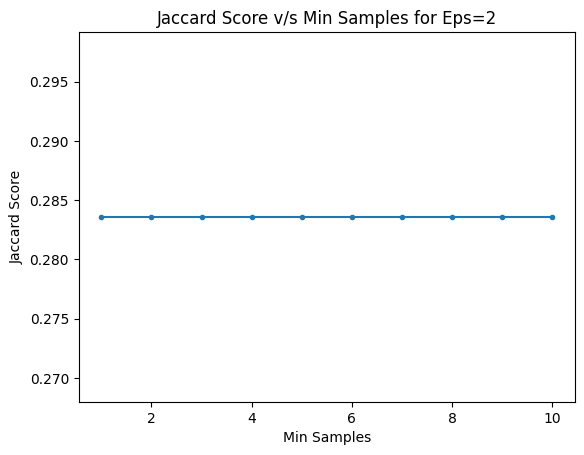

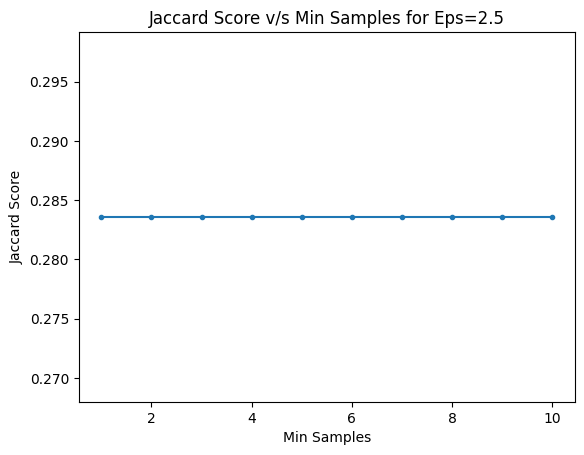

In [34]:
eps_arr = [0.1, .2, .3, .5, .8, 1, 1.2, 1.5, 1.8, 2, 2.5]
for eps in eps_arr:
    scores = []
    max_min_samples = 10
    for min_samples in range(1, max_min_samples + 1):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)
        scores.append(jaccard_score(y_enc, clusters, average='micro'))

    plt.plot(range(1, max_min_samples + 1), scores, marker='.')
    plt.xlabel("Min Samples")
    plt.ylabel("Jaccard Score")
    plt.title(f"Jaccard Score v/s Min Samples for Eps={eps}")
    plt.show()